# Netflix or Not?

Our project aims to predict if TV shows will be available on Netflix. Using web scraping, data analysis, and machine learning, we uncover patterns to forecast if a show will be included in Netflix's catalog. By analyzing data-driven insights, we gain a better understanding of content availability in the ever-changing world of streaming platforms.

# Netflix Series 1
 We use Selenium library and performs web scraping to extract Netflix series names from: www.whats-on-netflix.com.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# create a webdriver instance
driver = webdriver.Chrome()

# navigate to the page
driver.get("https://www.whats-on-netflix.com/library/series/")

# set a wait time for elements to load
wait = WebDriverWait(driver, 15)

# collect series names
series_names = []
for page in range(1, 98):
    # find all rows in the table
    row_elems = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "tr[role='row']")))
    for row_elem in row_elems:
        # find the first td element in the row
        series_elems = row_elem.find_elements(By.CSS_SELECTOR, "td.align-left")
        if series_elems:
            series_elem = series_elems[0]
            series_names.append(series_elem.text)
    # go to next page
    if page < 97:
        next_button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "a.paginate_button.current + a")))
        driver.execute_script("arguments[0].click();", next_button)

# close the webdriver instance
driver.quit()

# create a dataframe from the collected series names
df1 = pd.DataFrame({'Series Name': series_names})
df1.to_csv('series_names1.csv', index=False)


In [3]:
import pandas as pd
df1= pd.read_csv('series_names1.csv')
df1


,Series Name
0,#ABTalks
1,#blackAF
2,(Un)Well
3,100 Days My Prince
4,100 Humans
...,...
2408,Zindagi in Short
2409,Zoey 101
2410,Zona Rosa
2411,Zumbo's Just Desserts


# Netflix Series 2
We use BeautifulSoup library and performs web scraping to extract Netflix series names from: https://reelgood.com.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://reelgood.com/tv/source/netflix"

show_name_list = []
offset = 0

while True:
    params = {"offset": offset}
    response = requests.get(url, params=params)
    soup = BeautifulSoup(response.content, "html.parser")
    show_names = soup.find_all("span", {"data-testid": "content-listing-title"})
    if not show_names:
        break
    for name in show_names:
        show_name_list.append(name.text.strip())
    offset += 35 # increment the offset by 35 to retrieve the next page of results

# save the list of series names to a CSV file
df2 = pd.DataFrame({'Series Name': show_name_list})
df2.to_csv('series_names2.csv', index=False)


In [10]:
import pandas as pd
df2= pd.read_csv('series_names2.csv')
df2


,Series Name
0,The Night Agent
1,Beef
2,Unstable
3,Better Call Saul
4,Shadow and Bone
...,...
2342,Insiders
2343,Time to Eat with Nadiya
2344,Neymar: The Perfect Chaos
2345,Two Fathers


# Merge files

After we get two files of series, we merge them to one, (no duplicates of course).

In [4]:
df1.to_csv('series_names1.csv', index=False)
# read in both CSV files
df1 = pd.read_csv('series_names1.csv')
df2 = pd.read_csv('series_names2.csv')

# concatenate the two DataFrames
merged_df = pd.concat([df1, df2])

# drop any duplicates
merged_df = merged_df.drop_duplicates(keep = 'first')

# save the resulting DataFrame to a new CSV file
merged_df.to_csv('merged_series_file.csv', index=False)
merged_df  


,Series Name
0,#ABTalks
1,#blackAF
2,(Un)Well
3,100 Days My Prince
4,100 Humans
...,...
2335,Flower Crew: Joseon Marriage Agency
2340,Side Dish
2341,"Nuevo rico, nuevo pobre"
2343,Time to Eat with Nadiya


# Netflix Originals

If serie distribution is "Netflix" it will be in netflix for sure, so we want to know which of them is "Netflix" distribution.Hence we web scraping:https://www.what's-on-netflix.com/library/originals/.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# create a webdriver instance
driver = webdriver.Chrome()

# navigate to the page
driver.get("https://www.whats-on-netflix.com/library/originals/")

# set a wait time for elements to load
wait = WebDriverWait(driver, 30)

# collect series names
series_names = []
for page in range(1, 135):
    # find all rows in the table
    row_elems = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "tr[role='row']")))
    for row_elem in row_elems:
        # find the first td element in the row
        series_elems = row_elem.find_elements(By.CSS_SELECTOR, "td.align-left")
        if series_elems:
            if series_elems[2].text =='TV':
                series_elem = series_elems[0]
                series_names.append(series_elem.text)
    # go to next page
    if page < 135:
        next_button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "a.paginate_button.current + a")))
        driver.execute_script("arguments[0].click();", next_button)

# close the webdriver instance
driver.quit()

# create a dataframe from the collected series names
df3 = pd.DataFrame({'Series Name': series_names})
df3.to_csv('Series_Name_of_netflix.csv', index=False)


In [12]:
import pandas as pd
df3= pd.read_csv('Series_Name_of_netflix.csv')
df3


,Series Name
0,3Below: Tales of Arcadia
1,42 Days of Darkness
2,45 rpm
3,50M2
4,7 Days Out
...,...
1618,Young Wallander
1619,"Young, Famous & African"
1620,Your Life Is a Joke
1621,You're Nothing Special


# Filtered File
After we got our Series_Name_of_netflix file, we filterd our merged_file with it and delete all we found that is in Series_Name_of_netflix file and merged_file.

In [5]:
# Read the CSV files into dataframes
merged_df = pd.read_csv('merged_file.csv')
series_df = pd.read_csv('Series_Name_of_netflix.csv')

# Extract the series names as a list
series_names = series_df['Series Name'].tolist()

# Filter out the rows with series names in the merged dataframe
filtered_df = merged_df[~merged_df['Series Name'].isin(series_names)]

# Write the filtered dataframe to a new CSV file
filtered_df.to_csv('filtered_file.csv', index=False)
filtered_df


,Series Name
0,#ABTalks
1,#blackAF
2,(Un)Well
3,100 Days My Prince
4,100 Humans
...,...
2911,Flower Crew: Joseon Marriage Agency
2912,Side Dish
2913,"Nuevo rico, nuevo pobre"
2914,Time to Eat with Nadiya


# IMDb
Scrapes TV show data from IMDb, including details like name, certificate, year,genres, runtime, rating, votes and summary. It uses libraries like requests, BeautifulSoup, and pandas to retrieve and process the information, ultimately saving it in a CSV file.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.imdb.com/search/title/?title_type=tv_series'

shows = []
num_pages = 0

while num_pages < 5000:
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    shows_list = soup.find('div', {'class': 'lister-list'})

    if shows_list is None:
        continue

    for s in shows_list.find_all('div', {'class': 'lister-item-content'}):
        # extract name and year
        header = s.find('h3', {'class': 'lister-item-header'})
        series_name = header.find('a').text
        year = int(header.find('span', {'class': 'lister-item-year'}).text.strip('()')[:4]) if header.find('span', {'class': 'lister-item-year'}).text.strip('()')[:4].isdigit() else None


        # extract runtime, certificate, and genres
        info = s.find_all('p', {'class': 'text-muted'})
        runtime = info[0].find('span', {'class': 'runtime'}).text.strip()[:2] if info[0].find('span', {'class': 'runtime'}) else None
        if runtime:
            if not runtime.isdigit():
                runtime = None
            else:
                runtime = int(runtime)


        certificate_text = info[0].find('span', {'class': 'certificate'}).text.strip() if info[0].find('span', {'class': 'certificate'}) else None

        if certificate_text is None:
            certificate = None
        else:
            certificate = int(certificate_text[:2].replace('+','')) if certificate_text[:2].replace('+','').isdigit()  else None

        genres = info[0].find('span', {'class': 'genre'}).text.strip().split(', ') if info[0].find('span',
                                                                                             {'class': 'genre'}) else []
        num_genres = len(genres)

        # extract rating and votes
        rating = float(s.find('div', {'class': 'ratings-imdb-rating'}).find('strong').text) if s.find('div', {
            'class': 'ratings-imdb-rating'}) else None
        votes = int(s.find('span', {'name': 'nv'})['data-value'].replace(',', '')) if s.find('span', {'name': 'nv'}) else None

        # extract summary
        summary = info[1].text.strip() if len(info) > 1 else None

        # add the show details to the list
        shows.append([series_name, year, runtime, certificate, genres, num_genres, rating, votes, summary])

    num_pages += 1
    if num_pages >= 5000:
        break

    next_button = soup.find('a', {'class': 'lister-page-next'})
    if next_button:
        url = 'https://www.imdb.com' + next_button['href']
    else:
        break

# create dataframe from the list of shows
df = pd.DataFrame(shows, columns=['Name', 'Year', 'Runtime', 'Certificate', 'Genres', 'NumGenres', 'Rating', 'Votes', 'Summary'])

# # save the dataframe to a csv file
df.to_csv('imdb_tv_shows.csv', index=False)


In [8]:
import pandas as pd
df= pd.read_csv('imdb_tv_shows.csv')
df


,Name,Year,Runtime,Certificate,Genres,NumGenres,Rating,Votes,Summary
0,The Night Agent,2023.0,NaN,16.0,"['Action', 'Drama', 'Thriller']",3,7.6,34065.0,"Low-level FBI agent, Peter Sutherland, works i..."
1,The Mandalorian,2019.0,40.0,14.0,"['Action', 'Adventure', 'Fantasy']",3,8.7,525802.0,The travels of a lone bounty hunter in the out...
2,Succession,2018.0,60.0,16.0,"['Comedy', 'Drama']",2,8.8,168254.0,The Roy family is known for controlling the bi...
3,The Last of Us,2023.0,50.0,NaN,"['Action', 'Adventure', 'Drama']",3,8.9,370378.0,"After a global pandemic destroys civilization,..."
4,Yellowjackets,2021.0,60.0,NaN,"['Drama', 'Horror', 'Mystery']",3,7.9,58004.0,A wildly talented high school girl soccer team...
...,...,...,...,...,...,...,...,...,...
239002,Neil LaBute's Autobahn,NaN,NaN,NaN,['Drama'],1,NaN,NaN,Add a Plot
239003,Devrani Jethani Aur Woh,2023.0,NaN,NaN,['Drama'],1,NaN,NaN,Add a Plot
239004,KaroNaa,2023.0,NaN,NaN,['Drama'],1,NaN,NaN,Add a Plot
239005,Next Latin Kpop Star,NaN,NaN,NaN,['Game-Show'],1,NaN,NaN,Add a Plot


# Netflix col
In this part we add a new column 'Netflix' to the DataFrame with binary values indicating whether each TV show is available on Netflix or not.

In [9]:
import pandas as pd

# Read in the IMDb TV shows file
imdb_tv_shows = pd.read_csv('imdb_tv_shows.csv')

# Read in the merged series file
merged_series = pd.read_csv('filtered_file.csv')

# Create a set of TV show names that are available on Netflix
netflix_shows = set(merged_series['Series Name'])

# Add a 'Netflix' column to the IMDb TV shows DataFrame,
# setting it to 1 for shows that are available on Netflix and 0 otherwise
imdb_tv_shows['Netflix'] = imdb_tv_shows['Name'].apply(lambda x: 1 if x in netflix_shows else 0)

# Write the modified DataFrame back out to a CSV file
imdb_tv_shows.to_csv('imdb_tv_shows_with_netflix.csv', index=False)
imdb_tv_shows


,Name,Year,Runtime,Certificate,Genres,NumGenres,Rating,Votes,Summary,Netflix
0,The Night Agent,2023.0,NaN,16.0,"['Action', 'Drama', 'Thriller']",3,7.6,34065.0,"Low-level FBI agent, Peter Sutherland, works i...",1
1,The Mandalorian,2019.0,40.0,14.0,"['Action', 'Adventure', 'Fantasy']",3,8.7,525802.0,The travels of a lone bounty hunter in the out...,0
2,Succession,2018.0,60.0,16.0,"['Comedy', 'Drama']",2,8.8,168254.0,The Roy family is known for controlling the bi...,0
3,The Last of Us,2023.0,50.0,NaN,"['Action', 'Adventure', 'Drama']",3,8.9,370378.0,"After a global pandemic destroys civilization,...",0
4,Yellowjackets,2021.0,60.0,NaN,"['Drama', 'Horror', 'Mystery']",3,7.9,58004.0,A wildly talented high school girl soccer team...,0
...,...,...,...,...,...,...,...,...,...,...
239002,Neil LaBute's Autobahn,NaN,NaN,NaN,['Drama'],1,NaN,NaN,Add a Plot,0
239003,Devrani Jethani Aur Woh,2023.0,NaN,NaN,['Drama'],1,NaN,NaN,Add a Plot,0
239004,KaroNaa,2023.0,NaN,NaN,['Drama'],1,NaN,NaN,Add a Plot,0
239005,Next Latin Kpop Star,NaN,NaN,NaN,['Game-Show'],1,NaN,NaN,Add a Plot,0


# First clean of the data
In this code, we want to drop all the rows in the DataFrame where the "Rating" column is null. we believe there may be a connection between the rating of a TV show and its availability on Netflix.

In [10]:

# Read the cleaned dataset
df = pd.read_csv("imdb_tv_shows_with_netflix.csv")

# Drop all rows with missing Rating data
df = df.dropna(subset=["Rating"])

# Write the cleaned dataframe back to a CSV file
df.to_csv("imdb_tv_shows_with_netflix.csv", index=False) 
df


,Name,Year,Runtime,Certificate,Genres,NumGenres,Rating,Votes,Summary,Netflix
0,The Night Agent,2023.0,NaN,16.0,"['Action', 'Drama', 'Thriller']",3,7.6,34065.0,"Low-level FBI agent, Peter Sutherland, works i...",1
1,The Mandalorian,2019.0,40.0,14.0,"['Action', 'Adventure', 'Fantasy']",3,8.7,525802.0,The travels of a lone bounty hunter in the out...,0
2,Succession,2018.0,60.0,16.0,"['Comedy', 'Drama']",2,8.8,168254.0,The Roy family is known for controlling the bi...,0
3,The Last of Us,2023.0,50.0,NaN,"['Action', 'Adventure', 'Drama']",3,8.9,370378.0,"After a global pandemic destroys civilization,...",0
4,Yellowjackets,2021.0,60.0,NaN,"['Drama', 'Horror', 'Mystery']",3,7.9,58004.0,A wildly talented high school girl soccer team...,0
...,...,...,...,...,...,...,...,...,...,...
238683,Kaminaki Sekai no Kamisama Katsudou,2023.0,NaN,NaN,['Animation'],1,7.2,29.0,Yukito's parents are the leaders of a cult. Af...,0
238735,Kizuna no Ariru,2023.0,NaN,NaN,['Animation'],1,6.3,8.0,Add a Plot,0
238789,Les évangéliques à la conquête du monde,2023.0,NaN,NaN,['History'],1,7.4,7.0,Add a Plot,0
238894,Kawaisugi Crisis,2023.0,NaN,NaN,"['Animation', 'Comedy', 'Sci-Fi']",3,5.2,7.0,Add a Plot,0


# 75th percentile
Based on our previous discussion, we want to select TV shows with a higher number of votes by considering the 75th percentile.

In [2]:
import pandas as pd
# Read in the data
df = pd.read_csv("imdb_tv_shows_with_netflix.csv")

# Calculate the 75th percentile of the number of votes
x = df["Votes"].quantile(0.75)

# Filter out TV shows with less than the x number of votes
df_filtered = df[df["Votes"] >= x]

# Write the filtered dataframe back to a CSV file
df_filtered.to_csv('imdb_tv_shows_with_netflix_0.75.csv', index=False)
df_filtered


,Name,Year,Runtime,Certificate,Genres,NumGenres,Rating,Votes,Summary,Netflix
0,The Night Agent,2023.0,NaN,16.0,"['Action', 'Drama', 'Thriller']",3,7.6,34065.0,"Low-level FBI agent, Peter Sutherland, works i...",1
1,The Mandalorian,2019.0,40.0,14.0,"['Action', 'Adventure', 'Fantasy']",3,8.7,525802.0,The travels of a lone bounty hunter in the out...,0
2,Succession,2018.0,60.0,16.0,"['Comedy', 'Drama']",2,8.8,168254.0,The Roy family is known for controlling the bi...,0
3,The Last of Us,2023.0,50.0,NaN,"['Action', 'Adventure', 'Drama']",3,8.9,370378.0,"After a global pandemic destroys civilization,...",0
4,Yellowjackets,2021.0,60.0,NaN,"['Drama', 'Horror', 'Mystery']",3,7.9,58004.0,A wildly talented high school girl soccer team...,0
...,...,...,...,...,...,...,...,...,...,...
85670,Christopher Posch - Ich kämpfe für Ihr Recht!,2010.0,70.0,NaN,['Reality-TV'],1,3.8,188.0,Add a Plot,0
85731,The Allen and Craig Show,2008.0,12.0,NaN,['Comedy'],1,9.2,692.0,Allen drags his best friend Craig into creatin...,0
86011,Route 66: tatta hitori no america,2012.0,30.0,NaN,"['Documentary', 'Adventure', 'Reality-TV']",3,7.0,359.0,"The former NEWS member, Yamashita Tomohisa, dr...",0
86041,AboveGround,2014.0,19.0,NaN,['Drama'],1,8.3,165.0,AboveGround is a dramatic anthology series tha...,0


# Second clean of the data

In the second data cleaning step, we consider the potential relationship between the runtime of a TV show and its availability on Netflix. Therefore, we remove any rows from the dataset that have missing values in the "Runtime" column.

In [25]:
import pandas as pd

# read in the CSV file
df = pd.read_csv("imdb_tv_shows_with_netflix_0.75.csv")
df = df.dropna(subset=["Runtime"])
df.to_csv("imdb_tv_shows_with_netflix__0.75_no_Runtime.csv", index = False)
df


,Name,Year,Runtime,Certificate,Genres,NumGenres,Rating,Votes,Summary,Netflix
1,The Mandalorian,2019.0,40.0,14.0,"['Action', 'Adventure', 'Fantasy']",3,8.7,525802.0,The travels of a lone bounty hunter in the out...,0
2,Succession,2018.0,60.0,16.0,"['Comedy', 'Drama']",2,8.8,168254.0,The Roy family is known for controlling the bi...,0
3,The Last of Us,2023.0,50.0,NaN,"['Action', 'Adventure', 'Drama']",3,8.9,370378.0,"After a global pandemic destroys civilization,...",0
4,Yellowjackets,2021.0,60.0,NaN,"['Drama', 'Horror', 'Mystery']",3,7.9,58004.0,A wildly talented high school girl soccer team...,0
5,Ted Lasso,2020.0,30.0,18.0,"['Comedy', 'Drama', 'Sport']",3,8.8,244753.0,American college football coach Ted Lasso head...,0
...,...,...,...,...,...,...,...,...,...,...
21568,Simioscraft,2013.0,60.0,NaN,"['Animation', 'Adventure', 'Comedy']",3,8.4,151.0,"Holyfuu (Nico), Eddiesick (Edgar) y Alfredonx ...",0
21569,Christopher Posch - Ich kämpfe für Ihr Recht!,2010.0,70.0,NaN,['Reality-TV'],1,3.8,188.0,Add a Plot,0
21570,The Allen and Craig Show,2008.0,12.0,NaN,['Comedy'],1,9.2,692.0,Allen drags his best friend Craig into creatin...,0
21571,Route 66: tatta hitori no america,2012.0,30.0,NaN,"['Documentary', 'Adventure', 'Reality-TV']",3,7.0,359.0,"The former NEWS member, Yamashita Tomohisa, dr...",0


In [4]:
import pandas as pd

# read the dataset into a pandas DataFrame
df = pd.read_csv('imdb_tv_shows_with_netflix__0.75_no_Runtime.csv')
df.describe()


,Year,Runtime,Certificate,NumGenres,Rating,Votes,Netflix
count,15957.000000,16166.000000,701.000000,16166.000000,16166.000000,1.616600e+04,16166.000000
mean,2006.523908,39.281702,14.992867,2.135470,6.922962,7.487836e+03,0.029939
std,15.137405,17.301978,2.957065,0.854432,1.264955,4.296976e+04,0.170425
min,1946.000000,10.000000,0.000000,0.000000,1.000000,1.420000e+02,0.000000
25%,2000.000000,25.000000,14.000000,1.000000,6.400000,2.790000e+02,0.000000
50%,2011.000000,30.000000,16.000000,2.000000,7.100000,7.080000e+02,0.000000
75%,2018.000000,54.000000,16.000000,3.000000,7.800000,2.739500e+03,0.000000
max,2023.000000,99.000000,18.000000,3.000000,9.700000,2.147276e+06,1.000000


# Drop Certificate
In this step, we are dropping the "Certificate" column from the dataset. We observed that there are only 701 non-null values in the "Certificate" column, which accounts for a little more than 4% of all the rows. Therefore, we decided to remove this column from the dataset.

In [5]:
import pandas as pd

# read in the CSV file
df = pd.read_csv('imdb_tv_shows_with_netflix__0.75_no_Runtime.csv')
df = df.drop('Certificate', axis=1)
df.to_csv("imdb_tv_shows_with_netflix__0.75_no_Runtime.csv", index = False)
df.describe()


,Year,Runtime,NumGenres,Rating,Votes,Netflix
count,15957.000000,16166.000000,16166.000000,16166.000000,1.616600e+04,16166.000000
mean,2006.523908,39.281702,2.135470,6.922962,7.487836e+03,0.029939
std,15.137405,17.301978,0.854432,1.264955,4.296976e+04,0.170425
min,1946.000000,10.000000,0.000000,1.000000,1.420000e+02,0.000000
25%,2000.000000,25.000000,1.000000,6.400000,2.790000e+02,0.000000
50%,2011.000000,30.000000,2.000000,7.100000,7.080000e+02,0.000000
75%,2018.000000,54.000000,3.000000,7.800000,2.739500e+03,0.000000
max,2023.000000,99.000000,3.000000,9.700000,2.147276e+06,1.000000


# Data Sampling & Preprocessing

In this code, we are performing data manipulation and sampling. We read a dataset into a DataFrame, remove duplicates, and filter the DataFrame to keep only rows where the "Netflix" column equals 1. Then, we randomly select rows where the "Netflix" column equals 0 to reach a total of 1000 rows.

In [6]:
import pandas as pd

# read the dataset into a pandas DataFrame
df = pd.read_csv('imdb_tv_shows_with_netflix__0.75_no_Runtime.csv')
df = df.drop_duplicates(keep = 'first')
# filter the DataFrame to keep only rows where "Netflix" column equals 1
netflix_1 = df[df['Netflix'] == 1]
print(f"There are {len(netflix_1)} Netflix TV shows in the file")


# randomly select n rows from the DataFrame where "Netflix" column equals 0,
# where n is the number of rows needed to reach a total of 1000 rows
n = 1000 - len(netflix_1)
netflix_0 = df[df['Netflix'] == 0].sample(n=n, random_state=42)

# concatenate the rows where "Netflix" column equals 1 with the randomly selected rows
df_sampled = pd.concat([netflix_1, netflix_0])
df_sampled = df_sampled.sample(frac=1, random_state=42)

# save the sampled DataFrame to a new CSV file
df_sampled.to_csv('modified_clean_noduplicates_cleaned_filtered_sampled.csv', index=False)
df_sampled
df_sampled.describe()


There are 484 Netflix TV shows in the file


,Year,Runtime,NumGenres,Rating,Votes,Netflix
count,987.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,2010.665653,39.132000,2.209000,6.952500,1.687715e+04,0.484000
std,12.983984,16.687512,0.842632,1.214607,8.455058e+04,0.499994
min,1947.000000,10.000000,1.000000,1.300000,1.420000e+02,0.000000
25%,2006.000000,25.000000,1.000000,6.300000,3.952500e+02,0.000000
50%,2015.000000,37.500000,2.000000,7.100000,1.162000e+03,0.000000
75%,2019.000000,50.000000,3.000000,7.800000,5.112750e+03,1.000000
max,2023.000000,96.000000,3.000000,9.600000,1.954379e+06,1.000000


# Correlation

The first analytical part of the data involved applying the correlation function. Despite initial assumptions of a connection between a TV show's availability on Netflix and its rating, we discovered that there is actually a correlation between Netflix availability and both the year of release and the number of genres.

In [21]:
import pandas as pd

# Read in the CSV file
df = pd.read_csv("modified_clean_noduplicates_cleaned_filtered_sampled.csv")

# Filter the dataframe to include only the "Netflix" column and numeric columns
df_numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation between the "Netflix" column and other numeric columns
corr_matrix = df_numeric_columns.corrwith(df['Netflix'])

# Print the correlation coefficients
print(corr_matrix)


Year         0.287478
Runtime     -0.062252
NumGenres    0.199207
Rating      -0.006939
Votes        0.125662
Netflix      1.000000
dtype: float64


The data analysis reveals a notable positive correlation between Netflix and the "Year" variable, indicating a moderate relationship. Furthermore, a weak positive correlation is observed between Netflix and the "NumGenres" variable, suggesting a slight connection. These findings imply that there might be some association between the availability of a TV show on Netflix and both the year of its release and the number of genres it belongs to.

# EDA

lets explore and visualize various aspects of the TV show dataset, examining differences between Netflix and non-Netflix shows and analyzing the relationships between different features.

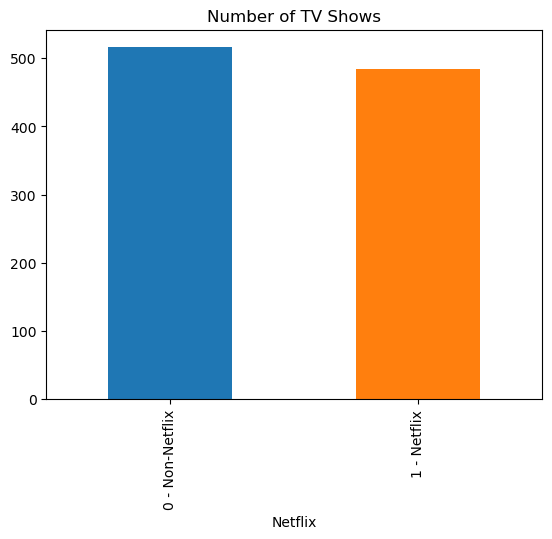

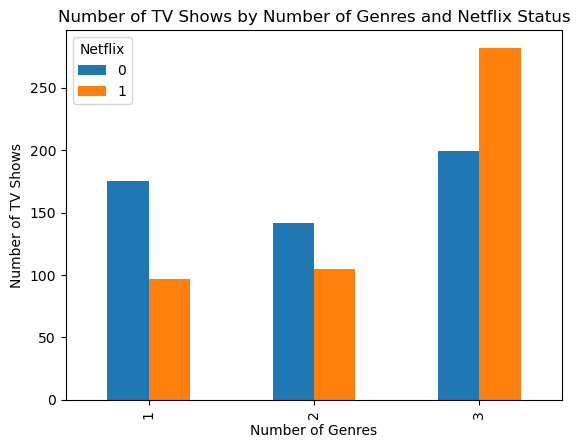

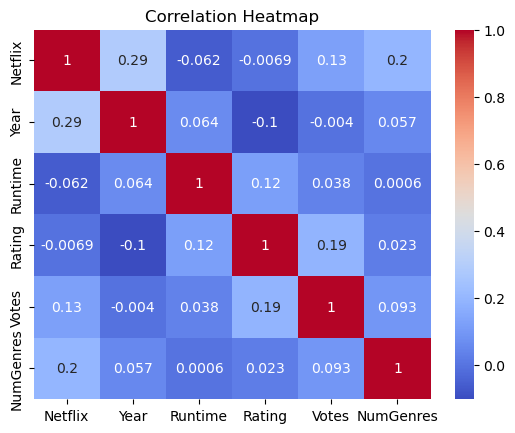

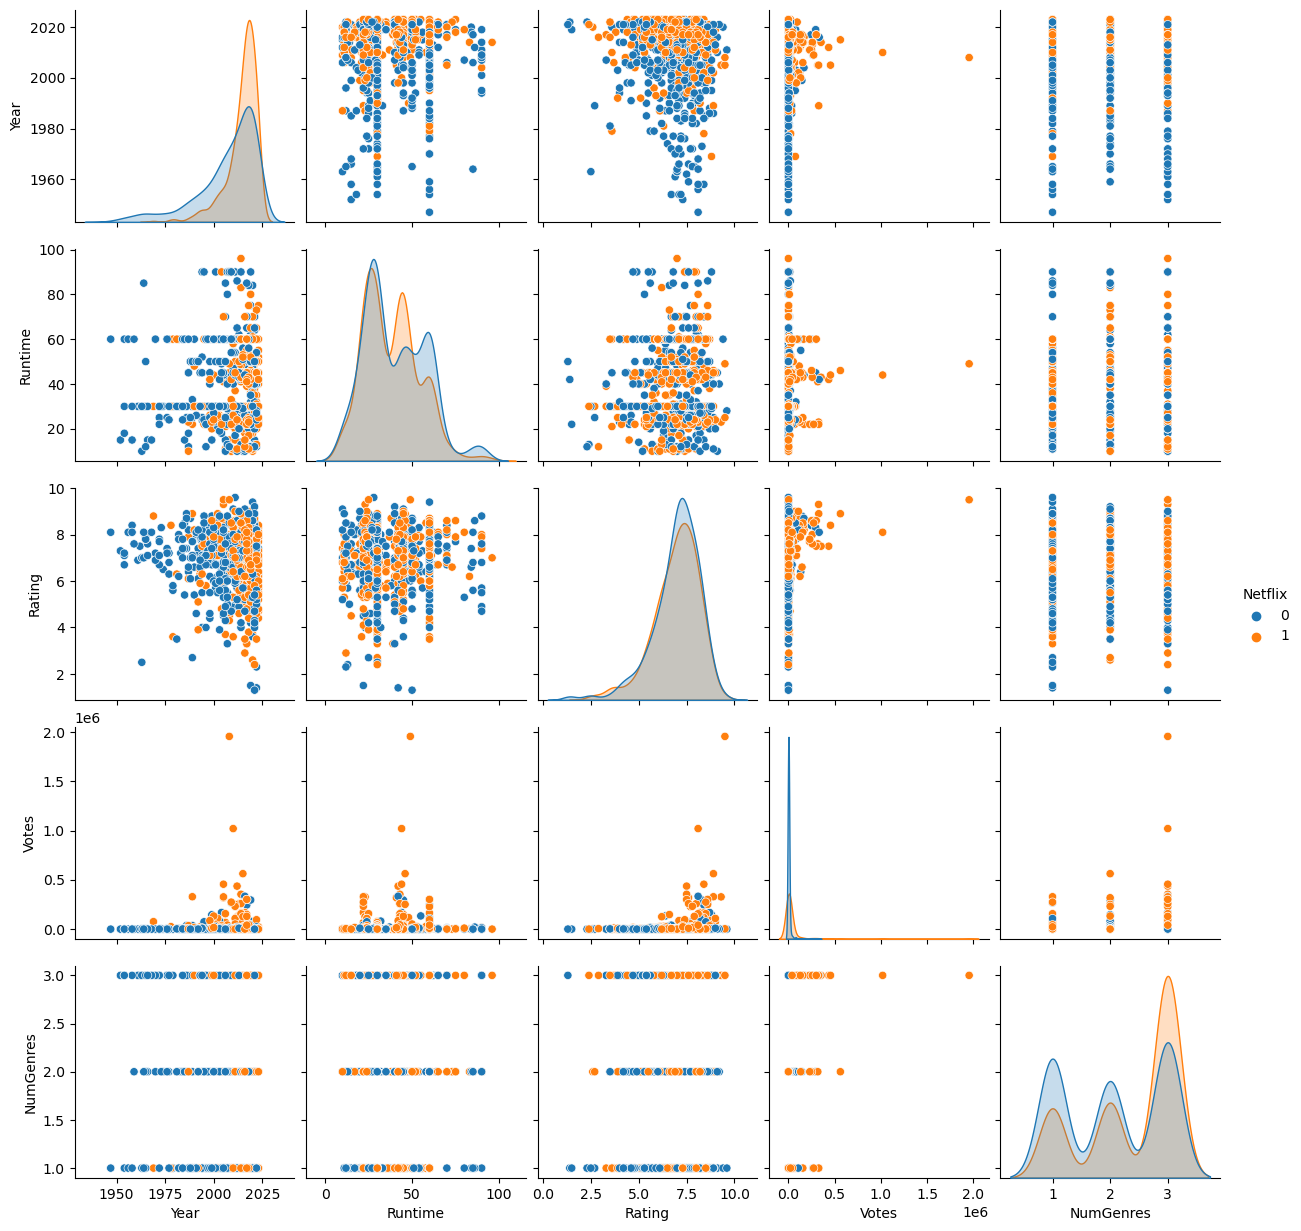

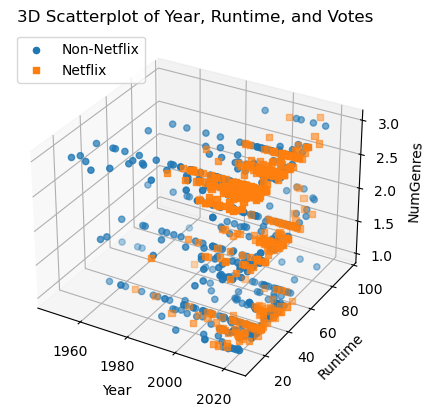

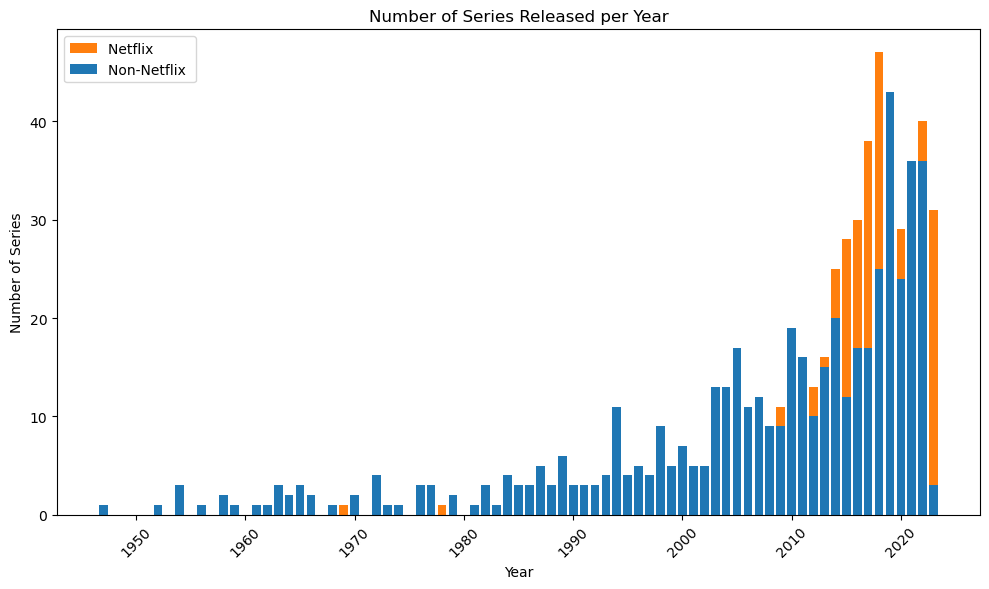

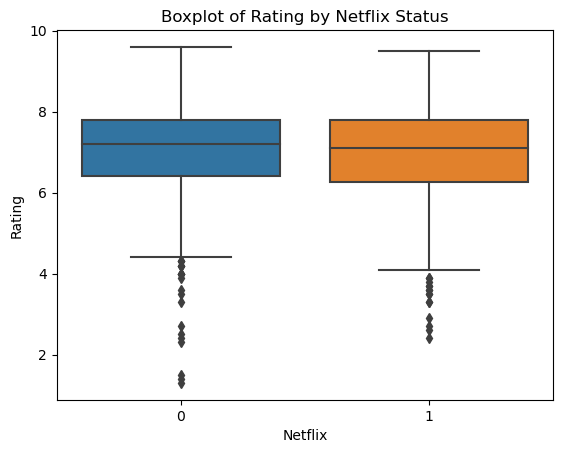

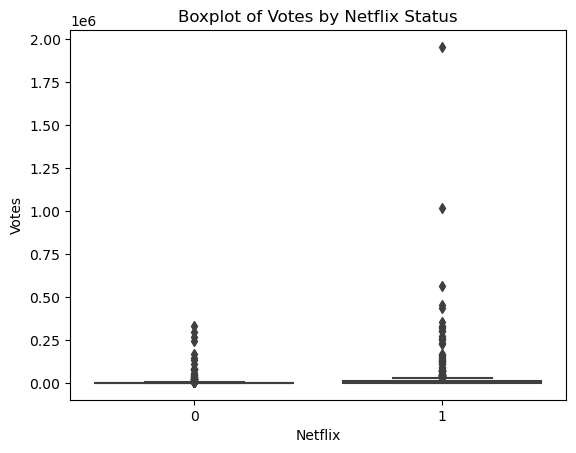

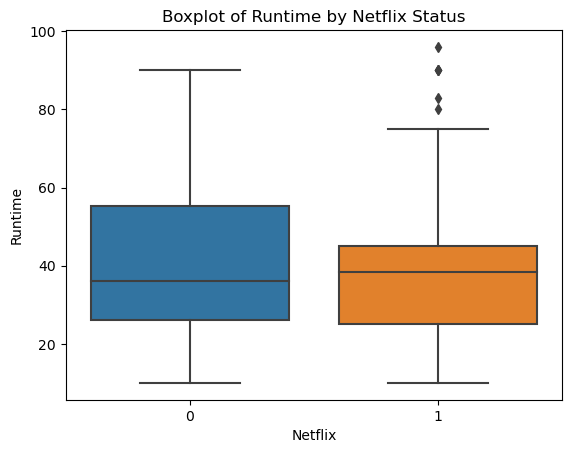

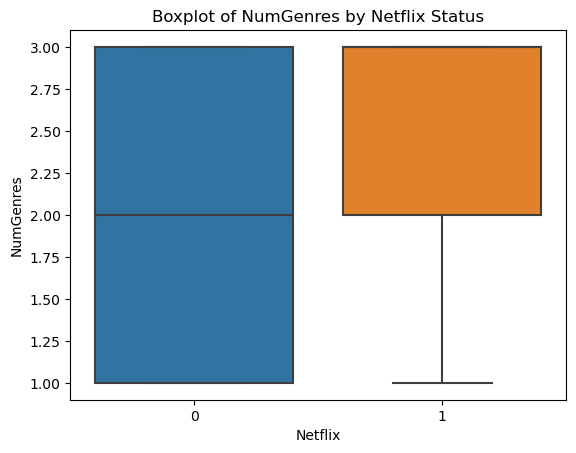

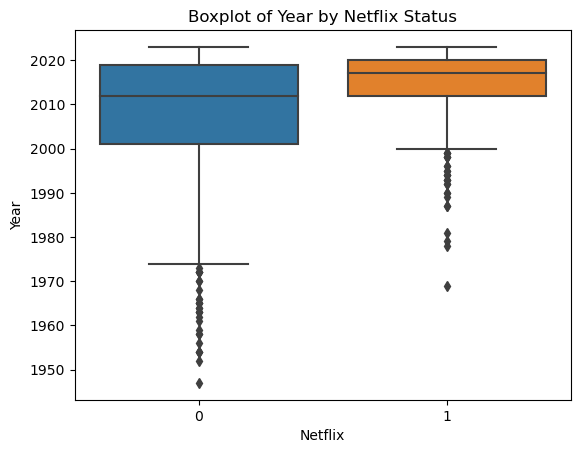

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
%matplotlib inline

# Load data from CSV file
df = pd.read_csv('modified_clean_noduplicates_cleaned_filtered_sampled.csv')

# Show differences between Netflix and non-Netflix movies

# read in the CSV file
# Plot the number of TV shows by Netflix status
df["Netflix"].value_counts().plot(kind='bar', color=['C0', 'C1'])

# Set the x-axis tick labels and title
plt.xticks([0, 1], ['0 - Non-Netflix', '1 - Netflix'])
plt.title('Number of TV Shows')

# Display the plot
plt.show()

# Create the cross-tabulation table
crosstab1_df = pd.crosstab(index=df['NumGenres'], columns=df['Netflix'])

# Plot the cross-tabulation table
crosstab1_df.plot(kind='bar', stacked=False)


# Add title and axis labels
plt.title("Number of TV Shows by Number of Genres and Netflix Status")
plt.xlabel("Number of Genres")
plt.ylabel("Number of TV Shows")

# Display the plot
plt.show()
# Create heatmap of correlations between numeric features
num_cols = ["Netflix",'Year', 'Runtime', 'Rating', 'Votes', 'NumGenres']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Create scatterplot matrix of numeric features, colored by Netflix status
sns.pairplot(df[num_cols], hue='Netflix')
plt.show()

# Create 3D scatterplot of Year, Runtime, and Votes, colored by Netflix status
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df['Netflix'] == 0]['Year'], df[df['Netflix'] == 0]['Runtime'], df[df['Netflix'] == 0]['NumGenres'], c='C0', marker='o', label='Non-Netflix')
ax.scatter(df[df['Netflix'] == 1]['Year'], df[df['Netflix'] == 1]['Runtime'], df[df['Netflix'] == 1]['NumGenres'], c='C1', marker='s', label='Netflix')
ax.set_xlabel('Year')
ax.set_ylabel('Runtime')
ax.set_zlabel('NumGenres')
plt.legend(loc='upper left')
plt.title('3D Scatterplot of Year, Runtime, and Votes')
plt.show()


# Group the data by year and count the number of series in each year
series_per_year = df.groupby(['Year', 'Netflix']).size().reset_index(name='Number of Series')

# Separate the data for Netflix (1) and non-Netflix (0) series
netflix_series = series_per_year[series_per_year['Netflix'] == 1]
non_netflix_series = series_per_year[series_per_year['Netflix'] == 0]

# Plot the number of series in each year for Netflix and non-Netflix with switched colors
plt.figure(figsize=(10, 6))
plt.bar(netflix_series['Year'], netflix_series['Number of Series'],color='C1' ,label='Netflix ')
plt.bar(non_netflix_series['Year'], non_netflix_series['Number of Series'],color='C0' ,label='Non-Netflix ')
plt.xlabel('Year')
plt.ylabel('Number of Series')
plt.title('Number of Series Released per Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# Create boxplot of Rating by Netflix status
sns.boxplot(x='Netflix', y='Rating', data=df)
plt.title('Boxplot of Rating by Netflix Status')
plt.show()

# Create boxplot of Votes by Netflix status
sns.boxplot(x='Netflix', y='Votes', data=df)
plt.title('Boxplot of Votes by Netflix Status')
plt.show()

# Create boxplot of Runtime by Netflix status
sns.boxplot(x='Netflix', y='Runtime', data=df)
plt.title('Boxplot of Runtime by Netflix Status')
plt.show()

sns.boxplot(x='Netflix', y='NumGenres', data=df)
plt.title('Boxplot of NumGenres by Netflix Status')
plt.show()

# Create boxplot of Year by Netflix status
sns.boxplot(x='Netflix', y='Year', data=df)
plt.title('Boxplot of Year by Netflix Status')
plt.show()


# Logistic regression

Wow, we've reached the interesting part! Using a logistic regression machine learning model, we will examine the question, "Can we predict if a TV show will be available on Netflix?" We will employ the dataset and try to predict the Netflix column.

In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()

df = pd.read_csv('modified_clean_noduplicates_cleaned_filtered_sampled.csv')
df_copy = df.drop(['Summary', 'Name', 'Genres'], axis=1)

# Handle missing values
df_copy[['Year', 'Votes', 'Runtime', 'Rating', 'NumGenres']] = imputer.fit_transform(df_copy[['Year', 'Votes', 'Runtime', 'Rating', 'NumGenres']])

# Scale the features
df_copy[['Year', 'Votes', 'Runtime', 'Rating', 'NumGenres']] = scaler.fit_transform(df_copy[['Year', 'Votes', 'Runtime', 'Rating', 'NumGenres']])

TRAINING_FEATURES = df_copy.columns[df_copy.columns != 'Netflix']
TARGET_FEATURE = 'Netflix'

X = df_copy[TRAINING_FEATURES]
y = df_copy[TARGET_FEATURE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
clf_model = LogisticRegression().fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1score}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Create a new DataFrame with names, actual labels, and predicted labels
df_results = pd.DataFrame({'Name': df.loc[X_test.index, 'Name'].reset_index(drop=True),
                           'Actual': y_test.reset_index(drop=True),
                           'Predicted': y_pred})

print(df_results)

y_true = df_results['Actual']
y_pred = df_results['Predicted']


tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)



Accuracy: 0.635
F1-score: 0.6343619366116896
Recall: 0.6818181818181818
Precision: 0.6637168141592921
                     Name  Actual  Predicted
0    Deutschland von oben       0          0
1                    Turn       0          1
2           Kengan Ashura       1          1
3                Insomnia       0          0
4           Austin & Ally       0          1
..                    ...     ...        ...
195         Sihirli Annem       0          1
196                Marlon       1          0
197          Death Valley       0          0
198    Samurai hai sukûru       0          0
199     Kim's Convenience       1          0

[200 rows x 3 columns]
True Negatives: 52
False Positives: 38
False Negatives: 35
True Positives: 75


# Results 1!

Our logistic regression model demonstrates moderate performance in predicting the availability of TV shows on Netflix. With an accuracy of 63.5%, the model showcases the ability to predict the labels with a reasonable level of accuracy. The F1-score of 0.634 indicates a balanced trade-off between precision and recall. The recall of 68.2% suggests that a significant proportion of actual positive labels is correctly identified, while the precision of 66.4% indicates the accuracy of predicted positive labels. While the model's performance may not be considered impressive in some contexts, it provides valuable insights into predicting the presence of TV shows on Netflix.

# DecisionTreeClassifier

Now we will use a decision tree model to classify IMDb TV shows and determine whether they would be available on Netflix or not. It leverages cross-validation to identify the optimal combination of hyperparameters for the decision tree.

best parameter set is: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 20} and its score was 0.6757142857142858
Accuracy: 0.6533333333333333


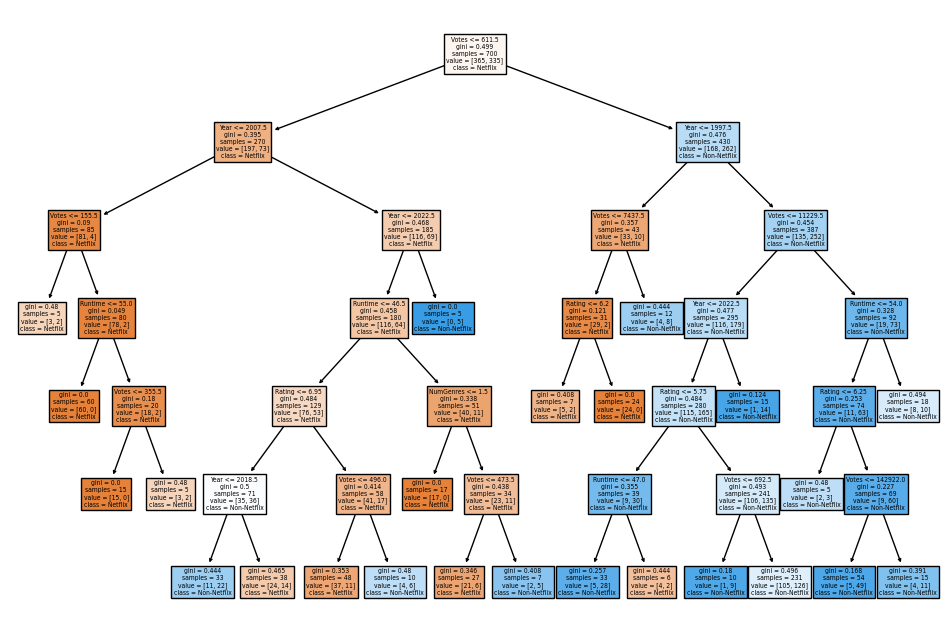

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn import tree, metrics
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

# load the data into a pandas dataframe
data = pd.read_csv('modified_clean_noduplicates_cleaned_filtered_sampled.csv')
numeric_cols = data[['Year', 'Runtime', 'NumGenres', 'Rating', 'Votes']]

# Fill the missing values with the median of each column
data[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())

# separate the features and target variable
X = data[['Year', 'Runtime', 'NumGenres', 'Rating', 'Votes']]
y = data['Netflix']



# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# define the decision tree classifier
dt = tree.DecisionTreeClassifier()

# define the parameter grid for GridSearchCV
parameters = {'max_depth':[2,4,6], "min_samples_split":[5, 10, 20, 25, 50], 'min_samples_leaf': [1, 5, 10, 20]}

# define the GridSearchCV object
clf = GridSearchCV(dt, parameters, scoring=make_scorer(metrics.accuracy_score), cv=20)

# train the model using the training set
clf.fit(X_train, y_train)

# print the best parameter set and its score
print("best parameter set is:", clf.best_params_, "and its score was", clf.best_score_)

# predict the target variable for the test set
y_pred = clf.predict(X_test)

# print the accuracy score of the model on the test set
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf.best_estimator_, feature_names=X.columns, class_names=['Netflix', 'Non-Netflix'], filled=True)
plt.show()


# Results2!

We experimented with a Decision Tree Classifier and found the best parameter set to be {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 20}, resulting in an accuracy of 67.5%. However, when applied to unseen data, the model achieved an accuracy of 65.3%. This indicates a slight drop in performance when encountering new, unseen data, but the model still shows promise in predicting the presence of TV shows on Netflix.

# RandomForestClassifier
Now we will use a Random Forest classifier to predict whether a TV show is available on Netflix or not, based on the provided features.The code aims to find the best set of hyperparameters for the classifier to achieve the highest accuracy score on the test dataset.

In [22]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



# load the data into a pandas dataframe
data = pd.read_csv('modified_clean_noduplicates_cleaned_filtered_sampled.csv')
numeric_cols = data[['Year', 'Runtime','NumGenres', 'Rating', 'Votes']]

# Fill the missing values with the median of each column
data[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())

# separate the features and target variable
X = data[['Year', 'Runtime', 'NumGenres', 'Rating', 'Votes']]
y = data['Netflix']

# split the data into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 1)

# create a random forest classifier
rf = RandomForestClassifier()

# define the parameter grid
parameters = {'n_estimators': [100, 300, 500], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# perform a grid search to find the best parameter combination
clf = GridSearchCV(rf, parameters, scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

# print the best parameter combination and its score
print("best parameter set is:",clf.best_params_)

# train a random forest classifier with the best parameter combination
rf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], min_samples_leaf=clf.best_params_['min_samples_leaf'])
rf.fit(XTrain, yTrain)

# evaluate the performance of the classifier on the training and testing data
y_pred_train = rf.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = rf.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))


best parameter set is: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on training data=  0.9371428571428572
Accuracy on test data=  0.7066666666666667


# Results 3!

We utilized the RandomForestClassifier and conducted hyperparameter tuning. The best parameter set for the RandomForestClassifier was determined to be {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}. The model achieved an impressive accuracy of 70.7% on the test data, showcasing the superior predictive power of the RandomForestClassifier compared to both logistic regression and the Decision Tree Classifier.

# Summary

These findings highlight the iterative process of model selection and improvement. By trying different models and optimizing their parameters, we were able to enhance our predictive performance. The RandomForestClassifier emerged as the most effective model, surpassing the performance of logistic regression and the Decision Tree Classifier.